In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

df = pd.read_csv('resources\loan_train.csv')

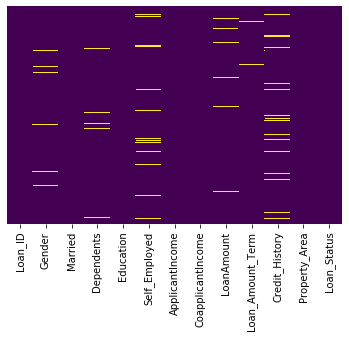

In [2]:
#Finding missing value and displaying in graph
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [3]:
#Replacing missing value of 'LoanAmount' by it's mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

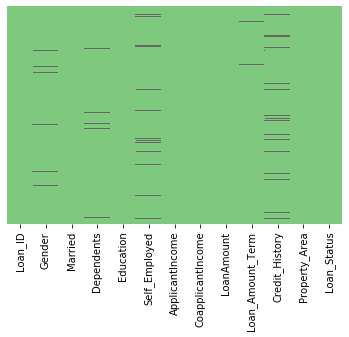

In [4]:
#Now displaying in graph
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Accent")

In [27]:
#Droping all missing value from data set
df.dropna(axis=0, how='any', inplace=True)
df.shape

(499, 13)

In [23]:
#Defined Z-Score method to remove outlier

def ZScore(df, col):
    mean = np.mean(df[col])
    std = np.std(df[col])
    Y = np.abs([((y - mean) / std) for y in df[col]])
    ndf = df.loc[(np.where(Y < 3))]
    
    return ndf

In [28]:
df.shape
rs = ZScore(df, 'ApplicantIncome')
print(rs)
rs.shape

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
494  LP002585    Male     Yes          0      Graduate            No   
495  LP002586  Female     Yes          1      Graduate            No   
496  LP002587    Male     Yes          0  Not Graduate            No   
497       NaN     NaN     NaN        NaN           NaN           NaN   
498  LP002600    Male     Yes          1      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0  146.412162           

(494, 13)

In [29]:
rs = ZScore(rs, 'LoanAmount')
print(rs)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
488  LP002555    Male     Yes          2      Graduate           Yes   
489  LP002556    Male      No          0      Graduate            No   
490       NaN     NaN     NaN        NaN           NaN           NaN   
491       NaN     NaN     NaN        NaN           NaN           NaN   
493  LP002582  Female      No          0  Not Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0  146.412162           

c:\python\venv\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
c:\python\venv\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


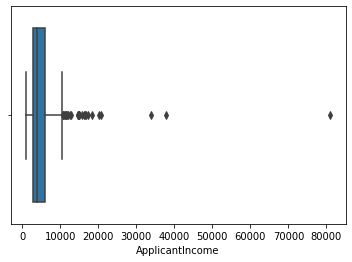

In [34]:
sns.boxplot(rs['ApplicantIncome'])